In [1]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
%run ../setup_notebook.ipynb

In [2]:
# general imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors as mcolors
import seaborn as sns
from subsets_analysis import Subsets
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
import run_functions as rf
import time
from scipy.optimize import curve_fit

In [3]:
# notebook specific imports
import pickle
import utils_funcs as utils
import re

In [4]:
# global plotting params
sns.set()
sns.set_style('white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.markersize': 15}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)

%matplotlib inline

In [5]:
figure_path = '/home/jrowland/mnt/qnap/Figures'

In [6]:
mice_dicts = [
    
{'mouse_id': 'J048', 'run_numbers': [27,28,29,30,32], 'runs': []},
{'mouse_id': 'RL048', 'run_numbers': [23, 24, 25, 28, 29], 'runs': []},
{'mouse_id': 'J063', 'run_numbers': [8,9,10,11,12,13,14], 'runs': []},
{'mouse_id': 'J064', 'run_numbers': [10,11,12,13,14,15], 'runs': []},
{'mouse_id': 'J065', 'run_numbers': [10,11,12,13,14,15], 'runs': []},
{'mouse_id': 'RL070', 'run_numbers': [22,23,24,27,28,29], 'runs': []},
{'mouse_id': 'RL072', 'run_numbers': [19,20,21,24], 'runs': []},
    
]

In [7]:
for mouse_dict in mice_dicts:
    for run_number in mouse_dict['run_numbers']:
        
        pkl_path = os.path.join(path_to_vape, 'run_pkls', mouse_dict['mouse_id'], 
                                'run{}.pkl'.format(run_number))

        with open(pkl_path, 'rb') as f:
            run = pickle.load(f)
            
        mouse_dict['runs'].append(run)
                

In [8]:
jitters = []
for mouse_dict in mice_dicts:
    for run_number, run in zip(mouse_dict['run_numbers'], mouse_dict['runs']):
        jitters.append(rf.jitter_tstart(run))

In [9]:
def get_month(run):
    return run.session.datetime.strftime('%Y-%m')

In [10]:
months = []
for mouse_dict in mice_dicts:
    for run_number, run in zip(mouse_dict['run_numbers'], mouse_dict['runs']):
        months.append(get_month(run))

In [11]:
months_set = np.sort(np.unique(months))
month_jitters = [[] for _ in range(len(months_set))]

for i, month in enumerate(months):
    sorted_idx = np.where(months_set==month)[0][0]
    month_jitters[sorted_idx].extend(jitters[i])
    
month_jitters = np.array(month_jitters)
month_jitters = [np.array(ms) for ms in month_jitters]

Text(0, 0.5, '% of trials\nwith onset jitter > 250 ms')

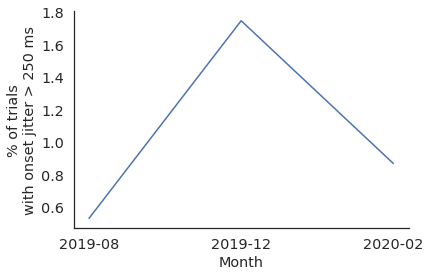

In [20]:
thresh = 250
above = [(sum(ms > thresh) / len(ms)) * 100 for ms in month_jitters]
plt.plot(months_set, above)
plt.xlabel('Month')
plt.ylabel('% of trials\nwith onset jitter > {} ms'.format(thresh))

(0, 20)

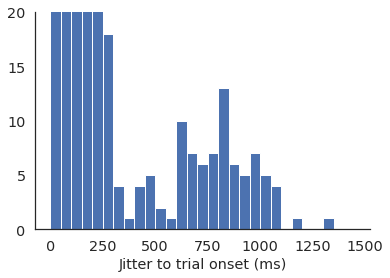

In [23]:
flattened = np.concatenate(jitters).ravel()
bins = np.arange(0,1500,50)
h = plt.hist(flattened, bins=bins)
plt.xlabel('Jitter to trial onset (ms)')
plt.ylim((0,20))
#plt.xlim((0,200))